In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

# 1. Data Preprocessing

In [2]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(filename="CarsData.csv"):
    car_data = pd.read_csv(filename)
    label_encoder = LabelEncoder()
    categorical_cols = ['model', 'transmission', 'fuelType', 'Manufacturer']
    for category in categorical_cols:
        car_data[category] = label_encoder.fit_transform(car_data[category])
    X = car_data.drop('price', axis=1)
    y = car_data['price']
    return X, y

def mean_encoding(filename="CarsData.csv"):
    car_data = pd.read_csv(filename)
    car_data = pd.get_dummies(car_data, columns=['transmission'])
    mean_model_price = car_data.groupby('model')['price'].mean()
    car_data['mean_model_price'] = car_data['model'].map(mean_model_price)
    mean_man_prices = car_data.groupby('Manufacturer')['price'].mean()
    car_data['mean_man_price'] = car_data['Manufacturer'].map(mean_man_prices)
    car_data = pd.get_dummies(car_data, columns=['fuelType'])
    car_data[['transmission_Automatic', 'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto']] = car_data[['transmission_Automatic', 'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto']].astype(float)
    car_data[['fuelType_Diesel', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol']] = car_data[['fuelType_Diesel', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol']].astype(float)
    car_data.drop(['model', 'Manufacturer', 'transmission_Semi-Auto', 'fuelType_Other'], axis=1, inplace=True)
    X = car_data.drop('price', axis=1)
    y = car_data['price']
    return X, y

# 2. Train & Test Set Split

In [4]:
from sklearn.model_selection import train_test_split
use_label_encoding = True # Change to False to try out mean encoding
if (use_label_encoding):
    X, y = label_encoding()
else:
    X, y = mean_encoding()
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 3. Model Training and Predicting

In [5]:
from sklearn.ensemble import RandomForestRegressor

In [6]:
experiment_hyperparas = {
    "n_estimators": [25, 50, 75, 100],
    "max_depth": [10, 30, 50, 70, 90],
    "min_samples_leaf": [10, 30, 50, 70, 90],
}
res_r2 = {
    "n_estimators": [],
    "max_depth": [],
    "min_samples_leaf": [],
}
res_mae = {
    "n_estimators": [],
    "max_depth": [],
    "min_samples_leaf": [],
}

In [7]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

for key in experiment_hyperparas.keys():
    if key == "n_estimators":
        for val in experiment_hyperparas[key]:
            model = RandomForestRegressor(n_estimators=val, n_jobs=-1)
            model.fit(X_train, y_train)
            y_pred = model.predict(x_test)
            mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
            mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
            r2 = r2_score(y_true=y_test, y_pred=y_pred)
            res_mae[key].append(mae)
            res_r2[key].append(r2)
    elif key == "max_depth":
        for val in experiment_hyperparas[key]:
            model = RandomForestRegressor(max_depth=val, n_jobs=-1)
            model.fit(X_train, y_train)
            y_pred = model.predict(x_test)
            mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
            mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
            r2 = r2_score(y_true=y_test, y_pred=y_pred)
            res_mae[key].append(mae)
            res_r2[key].append(r2)
    elif key == "min_samples_leaf":
        for val in experiment_hyperparas[key]:
            model = RandomForestRegressor(min_samples_leaf=val, n_jobs=-1)
            model.fit(X_train, y_train)
            y_pred = model.predict(x_test)
            mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
            mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
            r2 = r2_score(y_true=y_test, y_pred=y_pred)
            res_mae[key].append(mae)
            res_r2[key].append(r2)

# 4. Plots

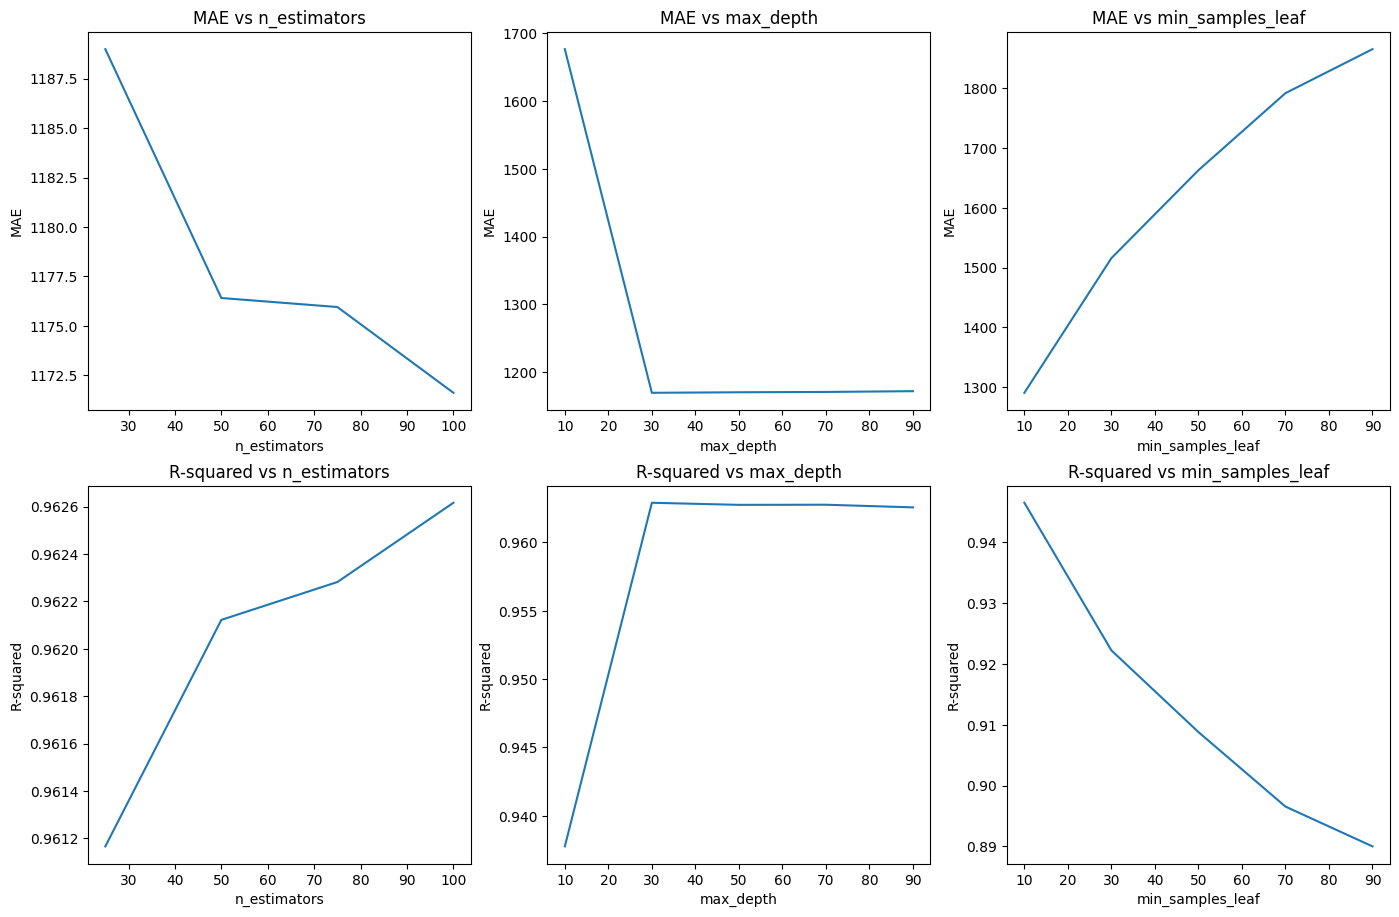

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(16.8, 10.8))
row, col = 0, 0
for i, key in enumerate(res_mae.keys()):
    axs[0, i].plot(experiment_hyperparas[key], res_mae[key])
    axs[0, i].set_title(f'MAE vs {key}')
    axs[0, i].set(xlabel=key, ylabel='MAE')

for i, key in enumerate(res_r2.keys()):
    axs[1, i].plot(experiment_hyperparas[key], res_r2[key])
    axs[1, i].set_title(f'R-squared vs {key}')
    axs[1, i].set(xlabel=key, ylabel='R-squared')